**Apply a linear regression model and a bayesian regression model on a dataset. Produce graphs for linear regression (OLS) and Bayesian Regression and compare them.|**
*   Ajay prudhvi Kalidasu - 500187692
*   Harpreet kaur Dounshi - 500187865
*   Sai sourabh Cherukupally - 500194560
*   Vimala Ponnambalam - 500188738
*   Yashaswini Tangirala - 500192762


**Reading the input file from GitHub**

In [126]:
import pandas as pd
df=pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/bayesian_lr/data/calories.csv')
df1=pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/bayesian_lr/data/exercise.csv')

In [128]:
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [129]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Merging Data on User_ID field** 

In [130]:
df_final=pd.merge(df,df1,on='User_ID')
df_final.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


**Removing unwanted columns and moving the prediction column to the last**

*Prediction variable = Calories*

In [131]:
df_final.drop(['User_ID'], axis=1,inplace=True)
first_col = df_final.pop('Calories')
df_final['Calories']=first_col
df_final.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


**We are going to perform analysis on one column**

X= Duration 
Y= Prediction

Below shows the relationship between the two variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


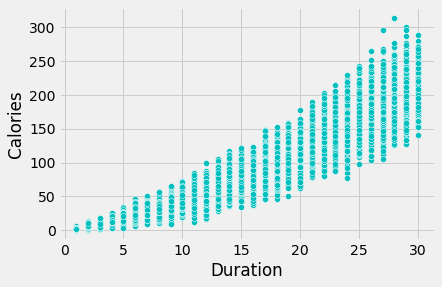

In [143]:
import seaborn as sns
sns.scatterplot(df_final['Duration'],df_final['Calories'],color='c')


We are splitting the data to perform prediction and compare the prediction with test data

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_final.iloc[:,4:5].values,df_final.iloc[:,-1:].values,test_size=0.2,random_state=6)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#x1_train=x_train['Duration']
lr.fit(x_train, y_train)
print('Intercept from library:', lr.intercept_)
print('Slope from library:', lr.coef_[0])

Intercept from library: [-21.64982195]
Slope from library: [7.1582833]


**From below we can observe that there is single value prediction for each data point in x value using OLS Linear regression**

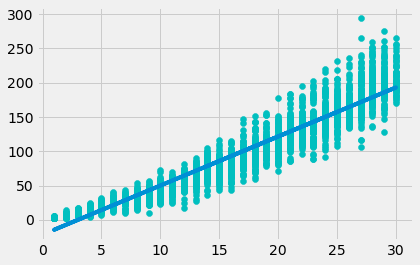

In [144]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test,color='c')
plt.plot(x_test,lr.coef_*x_test+lr.intercept_)

**We are assuming intecept, slope, mean and y-cap to standard values as per below**

In [60]:
    
# PyMC3 for Bayesian Inference
import pymc3 as pm

with pm.Model() as linear_model:
  # We are assuming intecept, slope, mean and y-cap to standard values as per below
  intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
  # Slope 
  slope = pm.Normal('slope', mu = 0, sd = 10)
    
  # Standard deviation
  sigma = pm.HalfNormal('sigma', sd = 10)
    
  # Estimate of mean
  mean = intercept + slope * x_test
    
  # Observed values
  Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y_test)
    
  # Sampler
  step = pm.NUTS()

  # Posterior distribution
  linear_trace = pm.sample(1000, step)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.


**normalised slope, intercept, mean and y-cap is required, with our standard values above, below are the visual presentation of the same**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


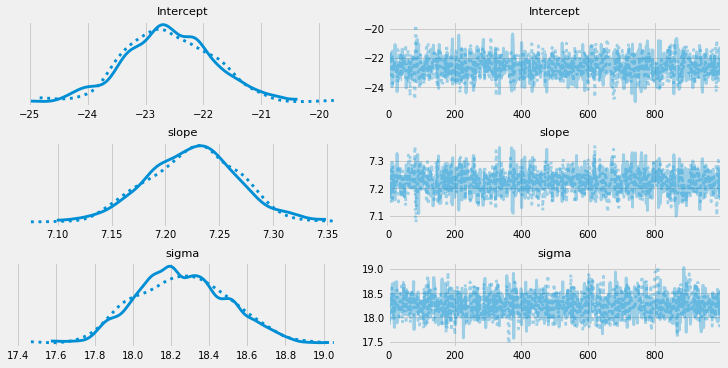

In [179]:
pm.traceplot(linear_trace, figsize = (10, 5));


**Below we can find the slope, intercept and sigma with mean values with distribution area of 94% each**

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78c0c38bd0>,
      dtype=object)

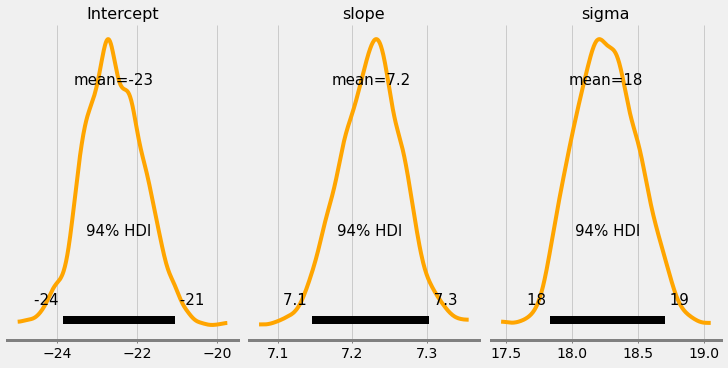

In [149]:
pm.plot_posterior(linear_trace, figsize = (10, 5),color='orange')

**Implementing prediction using Bayesian Model**

We can observe that Bayesian is almost same as linear regression line

/usr/local/lib/python3.7/dist-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


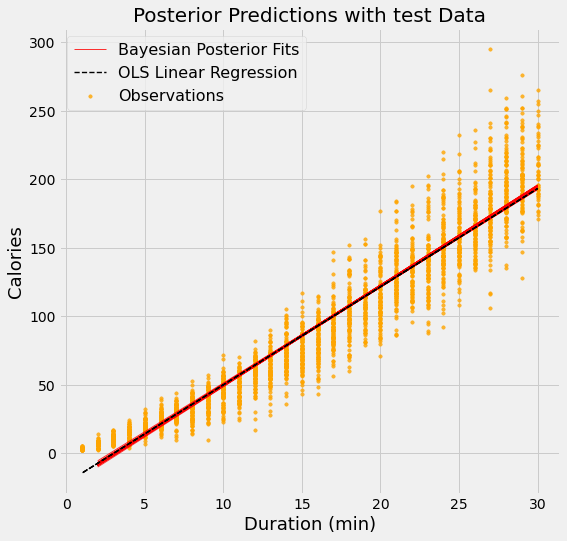

In [154]:
import numpy as np
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x_test, sample: sample['Intercept'] + sample['slope'] * x_test)

plt.scatter(x_test, y_test, s = 12, alpha = 0.8, c = 'orange', label = 'Observations')


plt.plot(x_test, lr.coef_*x_test+lr.intercept_, 'k--', label = 'OLS Linear Regression', linewidth = 1.4)

plt.title('Posterior Predictions with test Data', size = 20); plt.xlabel('Duration (min)', size = 18);
plt.ylabel('Calories', size = 18);
plt.legend(prop={'size': 16});


In [75]:
pm.summary(linear_trace)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-22.584,0.747,-23.849,-21.050,0.025,0.017,931.0,912.0,1.0
slope,7.225,0.042,7.146,7.303,0.001,0.001,963.0,836.0,1.0
sigma,18.260,0.240,17.839,18.709,0.007,0.005,1173.0,1013.0,1.0


In [112]:
bayesian_prediction = linear_trace['Intercept'] + linear_trace['slope'] * 20

In [113]:
bayes_prediction

array([121.62180346, 121.30901535, 121.83718663, ..., 122.39083849,
       121.51096567, 121.30493088])

In [89]:
y_predict = lr.predict(x_test)

**Below is the prediction  for Calorie burned = 20**

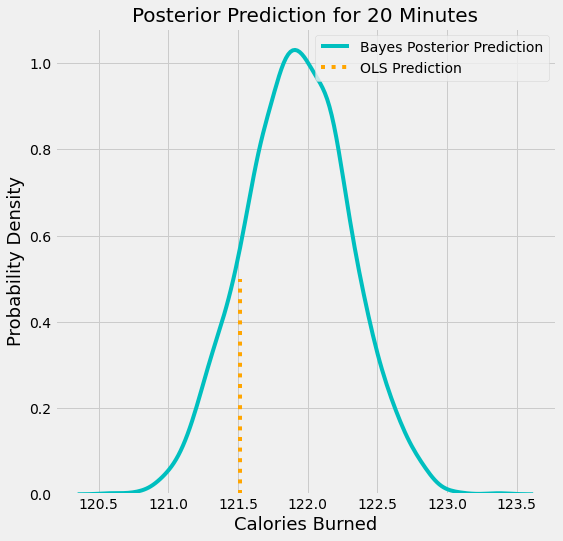

In [176]:
plt.figure(figsize = (8, 8))
plt.style.use('fivethirtyeight')
sns.kdeplot((bayesian_prediction), label = 'Bayes Posterior Prediction',color='c')


plt.vlines(x = lr.intercept_ + lr.coef_ * 20, ymin = 0, ymax = 0.5, label = 'OLS Prediction', colors = 'orange', linestyles='dotted')
plt.legend();
plt.xlabel('Calories Burned', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for 20 Minutes', size = 20);
